# 데이터 설명 및 목적

📌 목적: 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발

|변수 명|설명|
|:---|:---|
|`gender`|성별|
|`car`|차량 소유 여부|
|`reality`|부동산 소유 여부|
|`child_num`|자녀 수|
|`income_total`|연간 소득|
|`income_type`|소득 분류|
|`edu_type`|교육 수준|
|`family_type`|결혼 여부|
|`house_tpye`|생활 방식|
|`DAYS_BIRTH`|출생일, 데이터 수집 당시 (0)부터 역으로 셈|
|`DAYS_EMPLOYED`|업무 시작일, 데이터 수집 당시 (0)부터 역으로 셈, 양수 값은 고용되지 않은 상태|
|`FLAG_MOBIL`|핸드폰 소유 여부|
|`work_phone`|업무용 전화 소유 여부|
|`phone`|전화 소유 여부|
|`email`|이메일 소유 여부|
|`occyp_type`|직업 유형|
|`begin_month`|신용카드 발급 월, 데이터 수집 당시 (0)부터 역으로 셈|
|`credit`|사용자의 신용카드 대금 연체를 기준으로 한 신용도|



# (1) 데이터 셋 확인

## (1-1) 필요한 모듈 불러오기

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# (2) 데이터 불러오기

In [7]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/test.csv')
df_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/두시데이터[풀잎스쿨]/실습/sample_submission.csv')

## (2-1) 데이터 형태 확인

In [11]:
print('train shpae is:', df_train.shape, '\ntest shape is: ', df_test.shape, '\nsubmit shape is: ', df_submit.shape)

train shpae is: (26457, 20) 
test shape is:  (10000, 19) 
submit shape is:  (10000, 4)


* 각 파일을 로드하고 형태를 확인했습니다.
* train data는 26,457개 test data는 10,000개입니다.

In [31]:
print(df_train.columns, df_test.columns, df_submit.columns, sep='\n\n')

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')

Index(['index', '0', '1', '2'], dtype='object')


* `credit` 변수가 타깃 변수이므로 train data에는 column이 1개 더 많습니다.

In [32]:
display(df_train.head(3), df_test.head(3), df_submit.head(3))

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0


,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0


* submission data는 0, 1, 2로 이루어져 있습니다. 아무래도 신용등급 같습니다.
* 한번 train data의 `credit`변수만 확인해봅시다.

In [36]:
df_train['credit']

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

* 역시 신용등급이었습니다.

## (2-2) 각 Feature types 확인하기

* 향후 모델을 적용할 때 변수 유형이 제대로 설정되지 않으면 모델에 적용하기 어렵습니다.

In [42]:
print(df_train.dtypes, df_test.dtypes, sep='\n\n')

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
dtype: obj

## (2-3) 결측치 확인하기

In [48]:
print(df_train.isnull().sum() / df_train.shape[0]*100)

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64


In [49]:
print(df_test.isnull().sum() / df_test.shape[0]*100)

index             0.00
gender            0.00
car               0.00
reality           0.00
child_num         0.00
income_total      0.00
income_type       0.00
edu_type          0.00
family_type       0.00
house_type        0.00
DAYS_BIRTH        0.00
DAYS_EMPLOYED     0.00
FLAG_MOBIL        0.00
work_phone        0.00
phone             0.00
email             0.00
occyp_type       31.52
family_size       0.00
begin_month       0.00
dtype: float64


* train set과 test set에 비슷하게 `occyp_type`의 결측률이 30%를 초과합니다.
* 과감하게 삭제해야 할지, 남겨서 전통적인 결측 대체 방법을 선택해야 할지는 `credit`과의 상관관계를 확인하고 결정하겠습니다.

## (2-4) Target label 확인하기

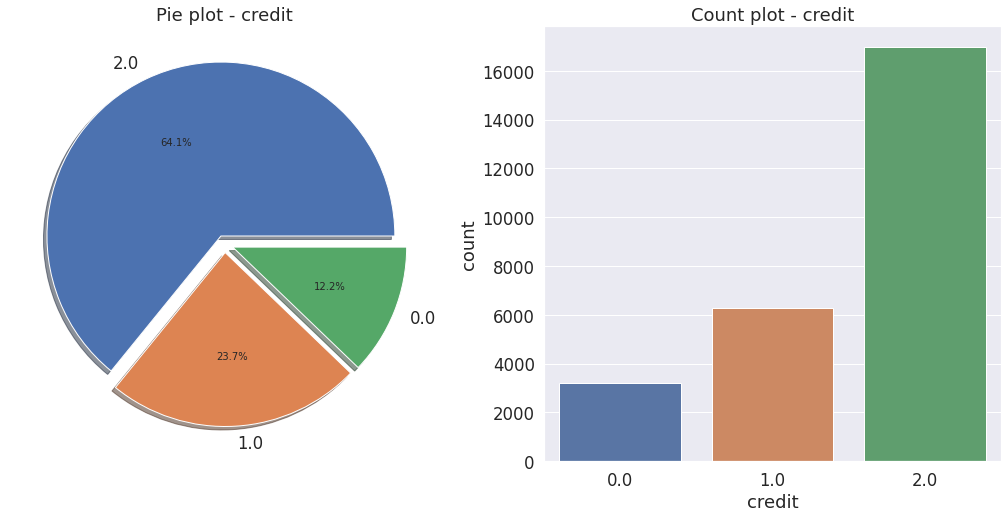

In [64]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['credit'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - credit')
ax[0].set_ylabel('')

sns.countplot('credit', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - credit')

plt.show()

* 신용등급이 2등급인 사람이 64.1%, 1등급이 23.7%, 0등급이 12.2%입니다.
* Count plot으로 확인했을 때도 2등급인 사람이 월등하게 많습니다.